In [50]:
import torch
import matplotlib.pyplot as plt
from torch import nn
torch.cuda.is_available()

True

In [47]:
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.rand((int(end / step), 1))
y = weight * X + bias

train_test_split = int(0.7 * len(X))

train_X = X[: train_test_split]

train_y = y[: train_test_split]

test_X = X[train_test_split:]

test_y = y[train_test_split:]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

torch.Size([35, 1]) torch.Size([35, 1]) torch.Size([15, 1]) torch.Size([15, 1])


In [48]:
def plot_predictions(train_data=train_X, 
                     train_labels=train_y, 
                     test_data=test_X, 
                     test_labels=test_y, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

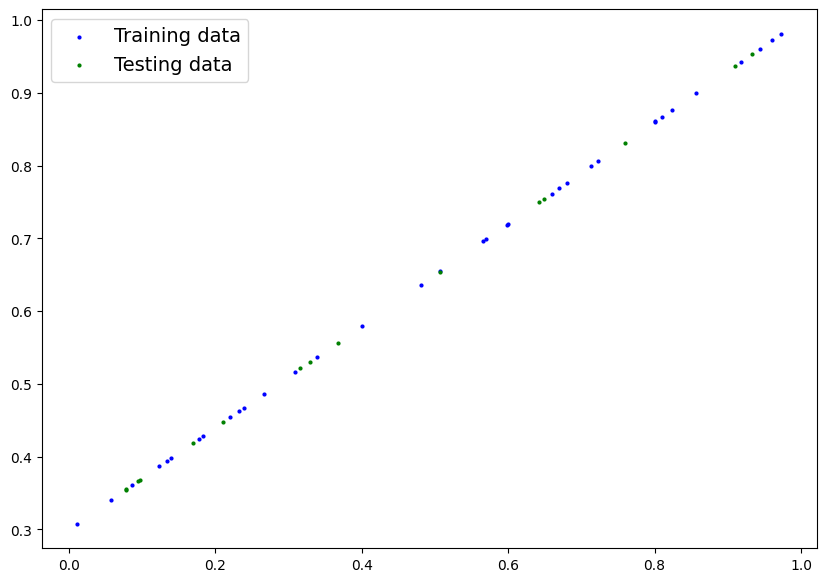

In [49]:
plot_predictions()

In [58]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=float, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, dtype=float, requires_grad=True))

    def forward(self, X : torch.tensor) -> torch.tensor:
        return self.weights * X + self.bias

In [82]:
torch.manual_seed(1234)

lr = LinearRegressionModel()

list(lr.parameters())

[Parameter containing:
 tensor([0.0461], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.4024], dtype=torch.float64, requires_grad=True)]

In [60]:
lr.state_dict()

OrderedDict([('weights', tensor([0.0461], dtype=torch.float64)),
             ('bias', tensor([0.4024], dtype=torch.float64))])

In [62]:
with torch.inference_mode():
    pred = lr(test_X)
    print(pred)

tensor([[0.4121],
        [0.4454],
        [0.4102],
        [0.4170],
        [0.4374],
        [0.4176],
        [0.4323],
        [0.4069],
        [0.4060],
        [0.4068],
        [0.4060],
        [0.4444],
        [0.4320],
        [0.4258],
        [0.4193]], dtype=torch.float64)


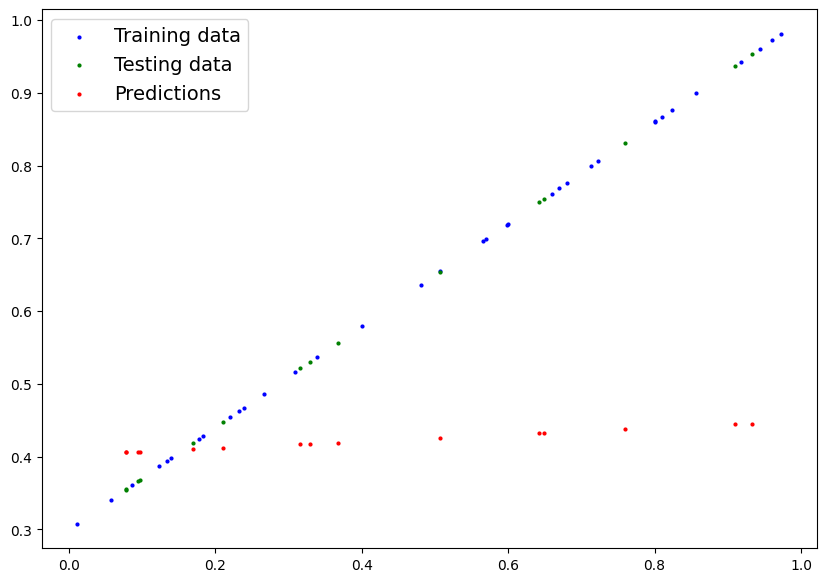

In [64]:
plot_predictions(predictions=pred)

In [83]:
loss = nn.L1Loss() # MAE loss

SGD = torch.optim.SGD(params=lr.parameters(), lr=0.01)

In [84]:
epochs = 200
torch.manual_seed(123)

train_epochs = []

train_losses = []
test_losses = []

for epoch in range(epochs):
    lr.train()

    y_pred = lr(train_X)

    train_loss = loss(y_pred, train_y)

    SGD.zero_grad()

    train_loss.backward()

    SGD.step()

    # Test
    lr.eval()

    with torch.inference_mode():
        test_pred = lr(test_X)

        test_loss = loss(test_pred, test_y)

        if epoch % 10 == 0:
            train_epochs.append(epoch)
            train_losses.append(train_loss.detach().numpy())
            test_losses.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {train_loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.24035253735746598 | MAE Test Loss: 0.18473933374375753 
Epoch: 10 | MAE Train Loss: 0.19225385379626436 | MAE Test Loss: 0.1571272714700138 
Epoch: 20 | MAE Train Loss: 0.16705356159780013 | MAE Test Loss: 0.1406538872055467 
Epoch: 30 | MAE Train Loss: 0.14949739031699408 | MAE Test Loss: 0.13596158072307316 
Epoch: 40 | MAE Train Loss: 0.13558016427556607 | MAE Test Loss: 0.13295013632125238 
Epoch: 50 | MAE Train Loss: 0.12362930110265499 | MAE Test Loss: 0.1297250798542651 
Epoch: 60 | MAE Train Loss: 0.11559444039261298 | MAE Test Loss: 0.12761776769769667 
Epoch: 70 | MAE Train Loss: 0.10886516951591216 | MAE Test Loss: 0.12396161887407073 
Epoch: 80 | MAE Train Loss: 0.10355179724865278 | MAE Test Loss: 0.1187566333833873 
Epoch: 90 | MAE Train Loss: 0.09823842498139339 | MAE Test Loss: 0.11355164789270385 
Epoch: 100 | MAE Train Loss: 0.09302197608374259 | MAE Test Loss: 0.1077349202539497 
Epoch: 110 | MAE Train Loss: 0.08782992438965258 | MAE Test

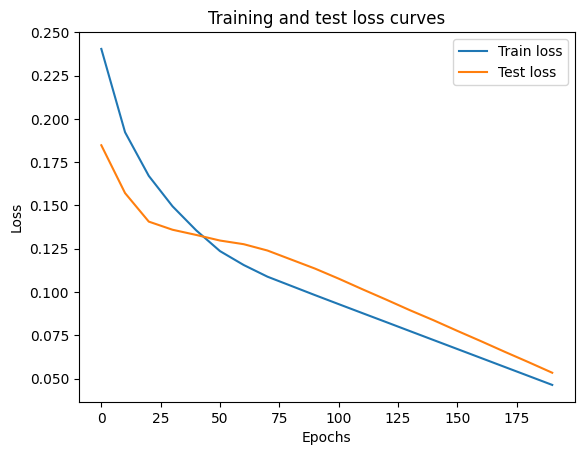

In [85]:
# Plot the loss curves
plt.plot(train_epochs, train_losses, label="Train loss")
plt.plot(train_epochs, test_losses, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [86]:
lr.state_dict()

OrderedDict([('weights', tensor([0.5446], dtype=torch.float64)),
             ('bias', tensor([0.3927], dtype=torch.float64))])

In [87]:
lr.eval()

with torch.inference_mode():
    pred = lr(test_X)
    print(pred)

tensor([[0.5075],
        [0.9007],
        [0.4847],
        [0.5648],
        [0.8064],
        [0.5723],
        [0.7462],
        [0.4456],
        [0.4349],
        [0.4444],
        [0.4355],
        [0.8880],
        [0.7424],
        [0.6684],
        [0.5926]], dtype=torch.float64)


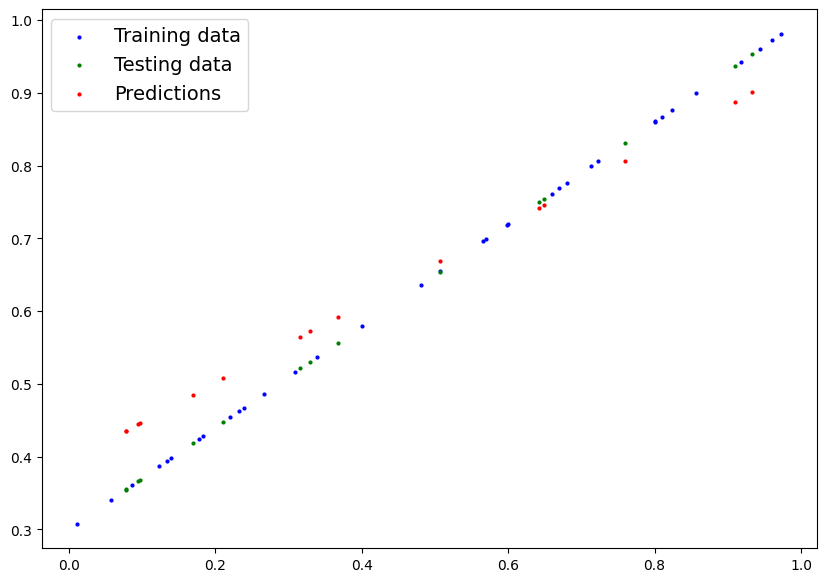

In [88]:
plot_predictions(predictions=pred)

In [89]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "custom-lr-model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=lr.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models\custom-lr-model.pth
